# 1.import packages

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2.Get Historic Pricing Data
data is from finance.yahoo.com in form of a .csv file.

In [205]:
df = pd.read_csv('TSLA.csv')
print(df)
print(df.describe())

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-02   84.900002   86.139999   84.342003   86.052002   86.052002   
1    2020-01-03   88.099998   90.800003   87.384003   88.601997   88.601997   
2    2020-01-06   88.094002   90.311996   88.000000   90.307999   90.307999   
3    2020-01-07   92.279999   94.325996   90.671997   93.811996   93.811996   
4    2020-01-08   94.739998   99.697998   93.646004   98.428001   98.428001   
..          ...         ...         ...         ...         ...         ...   
248  2020-12-24  642.989990  666.090027  641.000000  661.770020  661.770020   
249  2020-12-28  674.510010  681.400024  660.799988  663.690002  663.690002   
250  2020-12-29  661.000000  669.900024  655.000000  665.989990  665.989990   
251  2020-12-30  672.000000  696.599976  668.359985  694.780029  694.780029   
252  2020-12-31  699.989990  718.719971  691.119995  705.669983  705.669983   

        Volume  
0     47660500  
1     88892500  


# 3.Prepare the data
Before developing our regression model we are going to trim our data. The ‘Date’ column will be converted to a DatetimeIndex and the ‘Adj Close’ will be the only numerical values we keep. Everything else is getting dropped.

In [206]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df = df[['Adj Close']]
print(df)
print(df.info())


             Adj Close
Date                  
2020-01-02   86.052002
2020-01-03   88.601997
2020-01-06   90.307999
2020-01-07   93.811996
2020-01-08   98.428001
...                ...
2020-12-24  661.770020
2020-12-28  663.690002
2020-12-29  665.989990
2020-12-30  694.780029
2020-12-31  705.669983

[253 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-02 to 2020-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB
None


we try to get a visual picture of our data

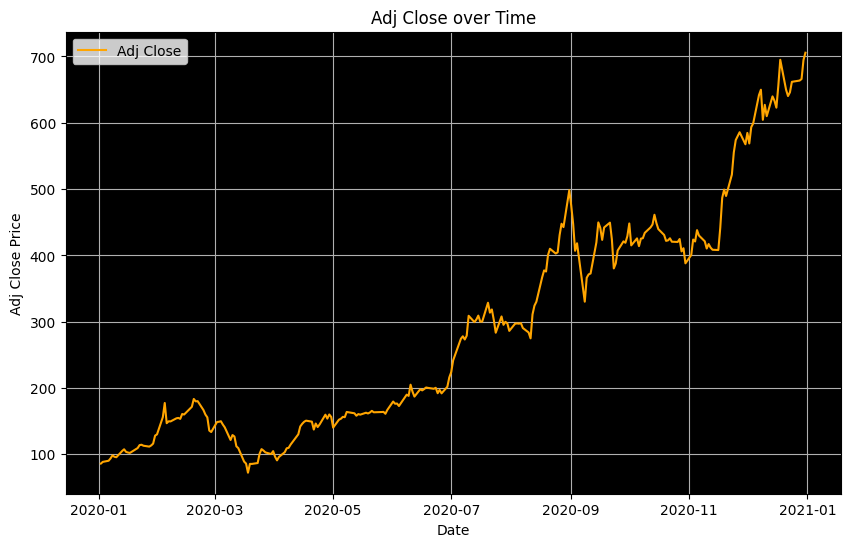

In [207]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='orange')
plt.title('Adj Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('black')
plt.show()

# 4.Adding Technical Indicators
Technical indicators are calculated values describing movements in historic pricing data for securities like stocks, bonds, and ETFs. Investors use these metrics to predict the movements of stocks to best determine when to buy, sell, or hold.
To get started, let’s add an exponential moving average (EMA) to our data:

In [221]:
import pandas_ta
df.ta.ema(close='adj_close', length=10, append=True)

[X] Ooops!!! It's True, the series 'adj_close' was not found in Adj Close, EMA_10


,Adj Close,EMA_10
Date,,
2020-01-16,102.697998,97.656035
2020-01-17,102.099998,98.464028
2020-01-21,109.440002,100.459660
2020-01-22,113.912003,102.905540
2020-01-23,114.440002,105.002715
...,...,...
2020-12-24,661.770020,643.572394
2020-12-28,663.690002,647.230141
2020-12-29,665.989990,650.641022


“EMA_10.” This is our newly-calculated value representing the exponential moving average calculated over a 10-day period. so we drop the first 9 days of our dataset.

In [215]:
df = df.iloc[10:]

             Adj Close      EMA_10
Date                              
2020-01-16  102.697998   97.656035
2020-01-17  102.099998   98.464028
2020-01-21  109.440002  100.459660
2020-01-22  113.912003  102.905540
2020-01-23  114.440002  105.002715
2020-01-24  112.963997  106.450221
2020-01-27  111.603996  107.387271
2020-01-28  113.379997  108.476858
2020-01-29  116.197998  109.880701
2020-01-30  128.162003  113.204574


Now we’re ready to start developing our regression model to see how effective the EMA is at predicting the price of the stock. First, let’s take a quick look at a plot of our data now to get an idea of how the EMA value tracks with the adjusted closing price.

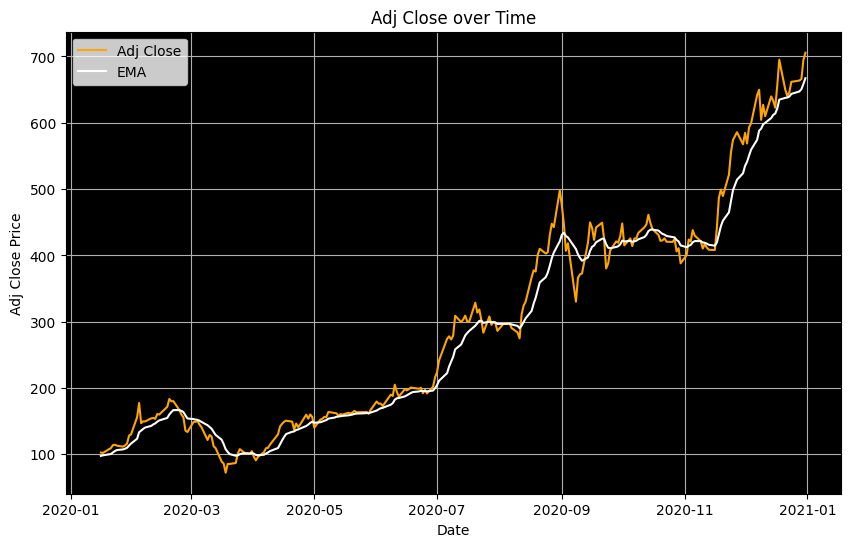

In [233]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df.index, df['Adj Close'], label='Adj Close', color='orange')
plt.plot(df.index, df['EMA_10'], label='EMA', color='white')
plt.title('Adj Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('black')
plt.show()

# 5.Test-Train Split

In [256]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)

194


# 6.Training the Model

In [257]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7.Validating the Fit

In [258]:
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.9435763]]
Mean Absolute Error: 13.45372147625187
Coefficient of Determination: 0.9903457094795037


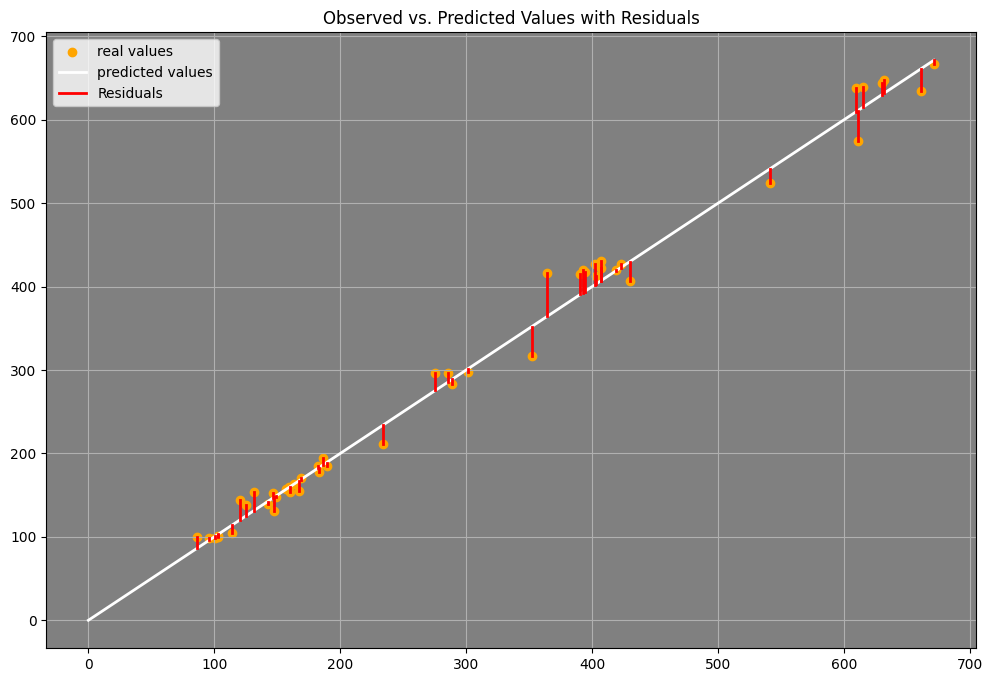

In [259]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test, color='orange', marker='o', alpha=1, label='real values')
plt.plot([0, max(y_pred)[0]], [0, max(y_pred)[0]], color='white', linestyle='-', linewidth=2, label='predicted values')
for i in range(len(residuals)):
    plt.plot([y_pred[i], y_pred[i]], [y_test.iloc[i], y_pred[i]], color='red', linestyle='-', linewidth=2, alpha=1)
plt.plot([0,0], [0,0], color='red', linestyle='-', linewidth=2, alpha=1, label='Residuals')
plt.title('Observed vs. Predicted Values with Residuals')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('grey')
plt.show()